Trevor McCaffrey, Video Assignment for Math 387 (Linear Algebra II)

## Application of Linear Algebra - Principal Component Analysis (PCA)

In this notebook, I will explain what PCA is, how we can derive it using linear algebra, and some interesting applications of it to real science data.

---

#### The Problem

When trying to solve a problem, we often analyze a data set containing information describing the problem, and proceed to see what information we can squeeze out of that data set to answer our problem at hand.

This may sometimes be simple. For example, suppose we have a large data set telling us the height, weight, and number of push-ups each person can do.  We do not know which subjects are boys or girls, but we suspect there are two separate distributions in these data.  

| Height | Weight (lbs) | # of Push-ups | Boy/Girl
| :- | -: | :-: | -:
| 5'2 | 130 | 14 | ?
| 5'10 | 150 | 21 | ?
| 6'0 | 165 | 24 | ?
| 5'8 | 160 | 29 | ?
| ... | ... | ... | ...
| 6'4 | 210 | 36 | ?
| 6'0 | 175 | 27 | ?
| 5'11 | 175 | 40 | ?

The easiest and most direct way to do this would be to make a simple 3-D plot of these variables and we will likely see two separate distributions representing that of boys and girls.  This is an efficient way to do this because we are dealing with a low(3)-dimensional space, which is easy for humans to visualize.  

A common problem arises when we are faced with a "real-world" data set, consisting of many more than just 3 variables.  

Suppose instead we had 500,000 500x500 pixel images of galaxies from the Hubble Space Telescope, and we wish determine how these galaxies are different, e.g, through their morphology (elliptical/spiral/irregular) and color.  All of this information (and more) is contained within the HST images.  

<img src="HSTgalaxies.jpg" alt="Drawing" style="width: 600px;"/>

The problem we are faced with now, however, is that rather than three variables (height, weight, and strength) describing our data, we now have 500x500 = 250,000 individual pixels describing each galaxy.  To **fully capture** how each individual image compares to one another, we would need to examine how each of the 250,000 values in each galaxy image compare, which is too large a task to perform: humans generally can not visualize >3 dimensions usefully, let alone how different objects may correlate throughout a *250,000*-dimensional space!

Fortunately for the human race, most high-dimensional data in the real world can be described by a much lower dimensional *representation* of itself, which still contains most of the information from the original high-dimension data set.  This is helpful for revealing physical trends in data.  This is doable because certain values in your data set are generally correlated, and may even be somewhat degenerate.  The dimensions of our new low-dimensional representation then represent *combinations* of our original variables.  

For example, height and weight may be combined into a single dimension describing each subject's BMI -- two dimensions are not necessary to describe to describe these properties because we can get most of the information we want from a single combination of these two.   In the case of galaxies, we need not examine each individual pixel; a good portion of the image is just dark sky, and what we really want to do is examine *groups* of pixels as this is what will tell us the morphology of the galaxy.

---

### PCA

This is where PCA comes into play.  PCA essentially applies a linear transformation to a data set such that our N-dimensional data set is transformed to D dimensions, where $D<<N$, and still contains close to all the information contained from the original N-dimensional data set.  In the language of statistics, the first axis $\vec{d}_1$, or "principal component", of the D-dimensional space will thus be the one-dimensional projection of our data that maximizes the variance in the data.  The second axis  $\vec{d}_2$, or second principal component, is the one-dimensional projection containing the second-most variance, subject to the constraint that it be orthogonal to $\vec{d}_1$.  The third axis would be the projection of the N-dimensional data containing the third-most variance, subject to the constraint that it be orthogonal to the preceding axes.  

We can continue this to find the "direction" of all D principal components.  In general, $\vec{d}_i$ is the one-dimensional projection of our N-dimensional data containing the $i^\mathrm{th}$ most variance, subject to the constraint that it be orthogonal to the axes  $\vec{d}_1,...,\vec{d}_{i-1}$.

Thus, PCA compresses our data set to lower dimension D, whose orthogonal axes reveal the physical variance in our data set better than any of the individual parameters alone.

##### Three Dimensional Example

<img src="3ddist.png" alt="Drawing" style="width: 400px;"/>

Above we have a plot of 3 variables.  However, all of the data points essentially just span a plane, so we can describe where each point is within the sample distribution using just two numbers.  Applying PCA to these data locates the plane that the points span. Defining new axes $z_1$ and $z_2$, we see that we retain the data distribution despite reducing the dimensionality:

<img src="3ddist_2dproj.png" alt="Drawing" style="width: 400px;"/>


##### Two Dimensional Example

In some cases, it may make sense to even apply PCA to 2-dimensional data.  The arrow pointing "in the direction" of the slope is where most of the variance is contained, so this would bbe the first principal component.  The second principal component is the vector perpendicular to the first, which describes the "scatter" for each data point.  We essentially can learn all we want about a particular data point from the first principal component alone, how far along a trendline the point is.

<img src="2dgaussian_pca.png" alt="Drawing" style="width: 400px;"/>


---


#### Under the Hood - Derivation of PCA 

We need an orthonormal set of basis vectors that align with the directions of maximum variance in our data set.  These final basis vectors are the "principal components" that come from this analysis.

If our data set consists of K observations, each with N different measured variables, we denote the full data set $\{\vec{x}_i\}$, where each $\vec{x}_i$ is a $N\times1$ vector containing data for all K obbservations.

The data set can be represented by a single matrix $X$,

$$ X = \underbrace{\begin{bmatrix}
           \vec{x}_{1}^T \\
           \vec{x}_{2}^T \\
           \vdots \\
           \vec{x}_{k}^T
         \end{bmatrix}}_{N\times K}. $$
         
If we normalize the data, so that each of the K variables has $\mu_i=0$ and $\sigma_i^2=1$, then the corresponding covariance matrix $C_X$ is just

$$ C_X = \frac{1}{N-1}X^TX. $$

If there existed no correlations between the existing variables in our data, this would just be a diagonal matrix.  Off-diagonal terms arise due to cross-correlations within our data, which we will exploit.

We now wish to identify a transformation matrix $R$ which projects $X$ onto its newer lower-dimensional space.  Denoting the projected data $Y$, we have:

$$ Y = \underbrace{X}_{K\times N}\underbrace{R}_{N\times D}, $$ where D is the number of dimensions we wish to visualize our data in.  Thus R consists of D axes, each of which contains information from the N variables we started with.

The corresponding covariance of $Y$ is

$$ C_Y = R^TX^TXR = R^TC_XR. $$


The first column of $R$, $r_1$, is the first principal component; it is normal so that $r_1^Tr_1=1$.  By definition, $r_1$ is the direction of maximum variance in our data set $X$.  To find the direction of $r_1$, we need to minimize $r_1^TC_Xr_1$, subject to the constraint $r_1^Tr_1=1$.  This can be done through the method of Lagrange multipliers:

$$ \phi(r_1,\lambda_1) = r_1^TC_Xr_1 - \lambda_1(r_1^Tr_1-1). $$

Differentiating with respect to $r_1$ and setting equal to zero, we see that:

$$ C_Xr_1 = \lambda_1r_1. $$

And we have our crucial result: **the principal components of $X$ are just the eigenvectors of its covariance matrix $C_X$.**  Finding the corresponding eigenvalues and ordering from greatest to least, we will have all of our ordered principal components.



---
---

### Application to Astronomy -- Quasar Spectra

Black holes form when young massive stars collapse under their own gravity and can proceed to strongly influence their host galaxies.  A *supermassive* black hole will begin actively accreting material from its surroundings -- dust, gas, sometimes stars -- and form an "accretion disk", which emits enormous amounts of light driven by friction in the disk.  *Quasars* are extreme examples of these phenomena, when the light from the accretion disk is so bright that it completely overwhelms the underlying starlight from their host galaxies.  As a result, galaxies that host quasars appear as single bright blue stars through our telescopes:

<table><tr>
<td> <img src="blackholegraphic.jpg" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="3c273.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>
Shown on the left is an artist's impression of a quasar; there is a supermassive black hole in the center accreting material, which in turn emits large amounts of light.  On the right is an actual optical image of 3C273, the first object ever identified as a quasar (Schmidt 1963); the brightness of the quasar is so high that its entire galaxy appears as a single star (hence the name: "quasar" = quasi-stellar galaxy).

---

To analyze the physics and chemistry occuring in different quasars, we point our telescope at them and take spectra.  The Sloan Digital Sky Survey (https://www.sdss.org) took spectra of over 500,000 quasars.  Shown below is a median UV-Optical spectrum of all quasars found in this survey (Vanden Berk et al. 2001):

<img src="vb01spec.png" alt="Drawing" style="width: 400px;"/>

Each quasar spectrum consists of a continuum (illustrated by the dashed lines) and emission lines.  The emission lines are significantly broadened due the rapid motion of gas around the central black hole; identifying broadened emission lines in ostensibly bright blue stars is the most efficient way of detecting large numbers of black holes in our universe.

Quasar spectra contain a wealth of information, and are key to advancing our understanding of black hole physics.  A typical spectrum contains $\sim3000$ pixels, each with a recorded flux at a given wavelength.  Thus, each quasar lies in a $\sim3000$-dimensional "spectrum space."  But it doesn't make sense to compare each individual pixel for all 500,000 quasars -- all we really care about is how the overall shape of the spectrum and strength of emission lines change.  It is currently thought that as low as three properties govern the behavior of quasars: their black hole mass, accretion rate (how fast it "eats up" material from its surroundings), and the spin rate of the black hole.  Thus, we should be able to describe the information present in the spectra in as low as 3 numbers, rather than >3000.

We can use PCA to reduce the dimensionality of these spectra, and attempt to physically interpret the principal components as components of physical quasar properties.

---

#### Load in quasar spectra

In [1]:
from sklearn.decomposition import PCA
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/Users/Trevor1/Desktop/git/RQQs/data/trainsample_dr7_zlt0.358.csv")
train.head()

,Unnamed: 0,SDSS_NAME,RA,DEC,REDSHIFT,PLATE,FIBER,MJD
0,48,b'000102.18-102326.9',0.259118,-10.390822,0.2943,650,166,52143
1,81,b'000149.52-100251.8',0.456358,-10.047724,0.3578,650,152,52143
2,157,b'000410.80-104527.1',1.045027,-10.757537,0.2397,650,18,52143
3,233,b'000557.23+002837.7',1.488499,0.477143,0.2596,388,385,51793
4,235,b'000601.82-052845.0',1.507606,-5.479184,0.3295,2630,149,54327


In [3]:
sdss_name = train["SDSS_NAME"].values
z         = train["REDSHIFT"].values
plate     = train["PLATE"].values
mjd       = train["MJD"].values
fiber     = train["FIBER"].values

In [4]:
#Will want to save homogeneous arrays of each QSO's wavelength, flux, and inverse variance
spectra = []
wave    = []

for sdss_name, red, pl, mj, fib in zip(sdss_name, z, plate, mjd, fiber):
    try:
        hdul_spec = fits.open("/Users/Trevor1/Desktop/git/RQQs/data/spectra/train/zlt0p6_dr7/lite/%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        continue
    
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>=4000) & (sdss_wave<=6750)) #include Halpha
    sdss_flux  = sdss_flux[wavemask]
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()
    
    if len(sdss_flux) >= 2272:
        spectra.append(sdss_flux[:2272])
        wave.append(sdss_wave[:2272])
    
spectra = np.array(spectra)
wave    = np.array(wave)

In [5]:
spectra /= np.median(spectra, axis=1)[:, np.newaxis]

In [6]:
spectra.shape

(3806, 2272)

Run PCA, determine eigenvectors and eigenvalues of covariance matrix.

In [7]:
#Now we reduce the dimensionality of the spectra from 3806 to 5!
pca_ncomp = 5
pca = PCA(n_components = pca_ncomp) # n_components can be optionally set

pca.fit(spectra) 
eigenvalues = pca.transform(spectra)
mean = pca.mean_ #Mean spectrum.  Will need to add this back in for reconstructions.
eigenvectors = pca.components_ 

In [8]:
print(pca.explained_variance_)

[86.49075   32.219467  14.692874   9.521772   3.2209458]


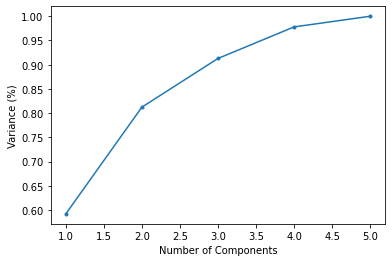

In [9]:
significance = [np.abs(i)/np.sum(pca.explained_variance_) for i in pca.explained_variance_]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(range(1,6), np.cumsum(significance), ".-")
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

Most of the variance can be explained by just 3 principal components.

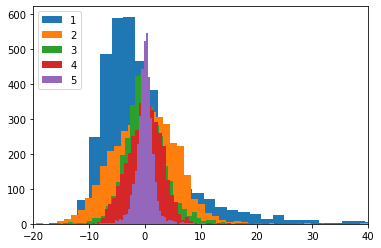

In [10]:
for i,n in enumerate(eigenvalues[0]):
    _ = plt.hist(eigenvalues[:,i],bins='scott',label='{}'.format(i+1))
plt.xlim(-20,40)
plt.legend(loc=2)
plt.show()

As expected, the spread of eigenvalues decreases for each principal component.

In [11]:
pca_evecs = np.vstack([pca.mean_,pca.components_]) #Include the mean in the components
#Treat mean as first eigenvector with eigenvalue of 1, so need to prepend 1.0 to each of the eigenvalue arrays
for i,eval in enumerate(eigenvalues):
    new_eval = np.insert(eval,0,1.0,axis=0)
    #print(eval,new_eval)
    if (i==0):
        pca_evals = new_eval
    else: 
        pca_evals = np.vstack([pca_evals,new_eval])

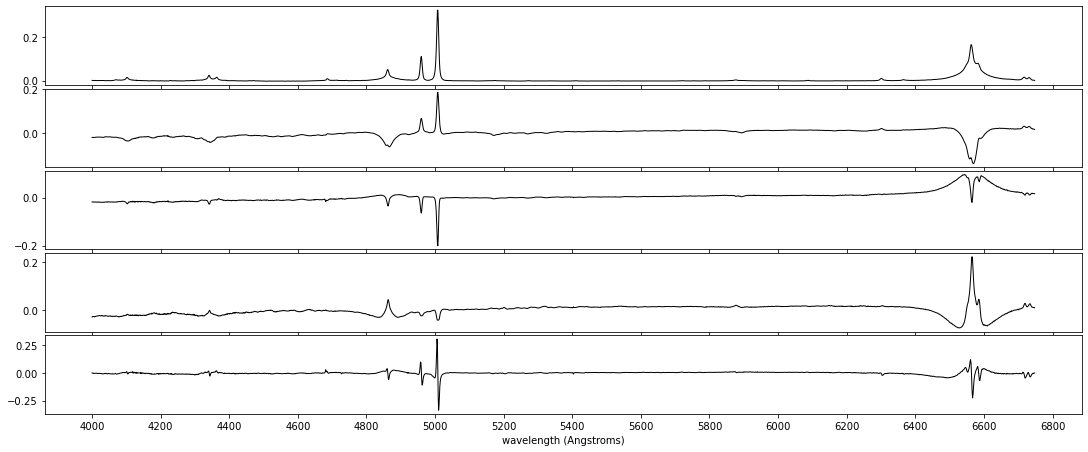

In [12]:
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

title = 'PCA components'

for j in range(1, len(pca_evecs)):
    
    # plot the components
    ax = fig.add_subplot(len(pca_evecs), 1, j+1)
    #ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.xaxis.set_major_locator(plt.MultipleLocator(200))
    if j < pca_ncomp - 1:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax.set_xlabel('wavelength (Angstroms)')
    if j>0:
        ax.plot(wave[0], pca_evecs[j], '-k', lw=1)
        ymin, ymax = ax.get_ylim()
        #ax.plot([1640.42,1640.42],[ymin,ymax],'--k')
        #ax.plot([1663.48,1663.48],[ymin,ymax],'--k')
        #ax.plot([1857.40,1857.40],[ymin,ymax],'--k')
        #ax.plot([1892.03,1892.03],[ymin,ymax],'--k')
        #ax.plot([1908.73,1908.73],[ymin,ymax],'--k')
        #ax.plot([2798.75,2798.75],[ymin,ymax],'--k')
        #ax.set_xlim(1600,3000)
        ax.set_ylim(ymin,ymax)
plt.show()

PCA finds correlations between emission lines.  As a result, instead of looking at the full quasar spectrum, we can just look at the eigenvalues to see "how much" contribution from emission/absorption of hydrogen or oxygen there is from each quasar spectrum.

If each quasar has spectrum $\Psi,$ the sample mean is $\bar{\Psi},$ and the $i^\mathrm{th}$ principal component is $p_i,$ we can "reconstruct" it with the equation:

$$ \tilde{\Psi} = \bar{\Psi} + \sum_{i=1}^{5} \lambda_i\vec{p}_i $$


In [13]:
reconstructions = mean+np.dot(eigenvalues, eigenvectors)

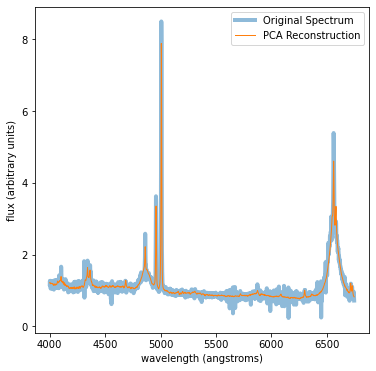

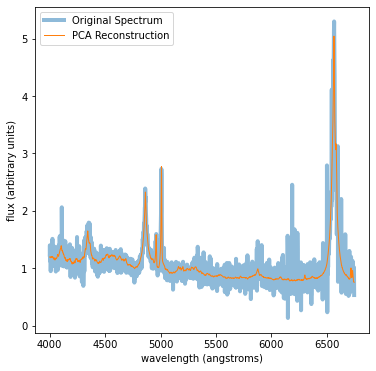

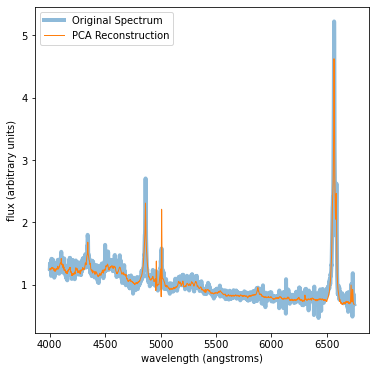

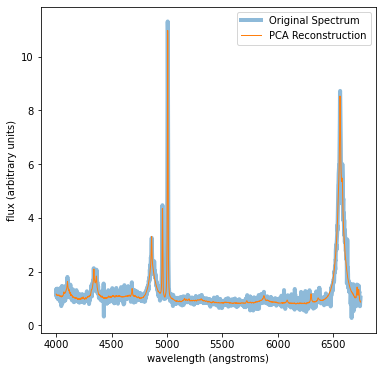

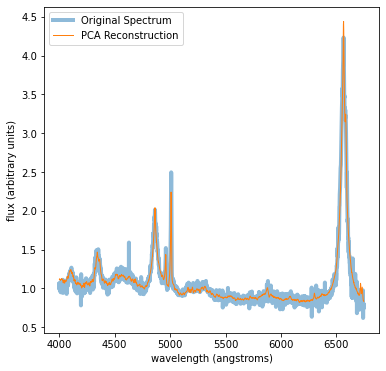

In [14]:
for i in range(5):
    fig = plt.figure(figsize=(6,6))
    plt.plot(wave[0], spectra[i,:], lw=4, alpha=0.5, label="Original Spectrum")
    plt.plot(wave[0], reconstructions[i,:], lw=1, label="PCA Reconstruction")
    plt.xlabel("wavelength (angstroms)")
    plt.ylabel("flux (arbitrary units)")
    plt.legend(loc="best")
    plt.show()

We see that most of the information is retained, despite reducing the dimensionality of the spectra from 3800 to 5.  Analyzing how 5 numbers, rather than 3000, may vary from object to object is a lot simpler for astronomers!

---

Trying to understand how the eigenvalues of spectra connect to physical properties of quasars is still an active area of research.  Part of the problem may be the very fact that linear reconstruction techniques such as principal component analysis *are linear*.  It is entirely plausible that the properties that govern quasar physics -- black hole mass, accretion rate, and spin -- are related in extremely *non-linear* ways, meaning that PCA just cannot fully capture what's going on.  More sophisticated non-linear techniques may be a key forward.